# Torque data presentation

## Data read out

In [1]:
import pandas as pd

#import data
#in csv Amp Data
dataSR = pd.read_csv("Helmholtz-Torque-Data1-73025.csv",sep=",",header=None)
dataLR = pd.read_csv("Helmholtz-Torque-Data2LR-73025.csv",sep=",",header=None)

# Notbook Amp+Gauss Data
data2SR = pd.read_csv("Helmholtz-Torque-Data1-80425.csv",sep=",",header=None)
data2LR = pd.read_csv("Helmholtz-Torque-DataLR-73125.csv",sep=",",header=None)

#extract amps measurements from dataSR and dataLR on the 101 index
ampsSR = dataSR.iloc[101]
ampsLR = dataLR.iloc[101]

# Keep only rows up to (but not including) row 100
dataSR = dataSR.iloc[:100]
dataLR = dataLR.iloc[:100]
data2SR = data2SR.iloc[:100]
data2LR = data2LR.iloc[:100]

In [2]:
import numpy as np

#Get average of 100 points, with its std and SEM
def average_df(df):
    # Number of rows for SEM calculation
    n = len(df)

    # Compute stats
    mean_vals = df.mean(numeric_only=True)
    std_vals = df.std(numeric_only=True, ddof=1)  # sample std
    sem_vals = std_vals / np.sqrt(n)

    # Combine into one DataFrame
    result = pd.DataFrame({
        "Average voltage out": mean_vals,
        "Vol Std": std_vals,
        "Vol SEM": sem_vals
    })
    return result


avg_dataSR = average_df(dataSR)
avg_dataLR = average_df(dataLR)
avg_data2SR = average_df(data2SR)
avg_data2LR = average_df(data2LR)

## Gauss and amps insertion

In [3]:
def gauss_stats_from_ranges(amps_list, ranges_list, step=0.1):
    """
    Given a list of Amps and corresponding Gauss ranges [(start, stop), ...],
    return a DataFrame with Amps, Gauss_mean, Gauss_std, Gauss_SEM.
    """
    gauss_means = []
    gauss_stds = []
    gauss_sems = []

    for r in ranges_list:
        vals = np.arange(r[0], r[1] + step/2, step)  # include endpoint
        gauss_means.append(vals.mean())
        gauss_stds.append(vals.std(ddof=1))
        gauss_sems.append(vals.std(ddof=1)/np.sqrt(len(vals)))

     #Convert means from Gauss to Tesla
    gauss_means = np.array(gauss_means)/10000
    gauss_stds = np.array(gauss_stds)/10000
    gauss_sems = np.array(gauss_sems)/10000

    return pd.DataFrame({
        "Amps": amps_list,
        "Bfield_mean": gauss_means,
        "Bfield_std": gauss_stds,
        "Bfield_SEM": gauss_sems
    })

In [4]:
#Values from our notes, 

# 2SR ranges (start, stop) in Gauss
ranges_2SR = [
    (-0.1, 0), (3.3, 3.4), (7, 7.2), (10.4, 10.7),
    (14.1, 14.3), (17.4, 17.7), (20.9, 21.1), (24.2, 24.4),
    (27.1, 27.5), (31.1, 31.3), (34.4, 34.6), (37.9, 39.1)
]
amps_2SR = [0, 0.5, 1.024, 1.511, 2.020, 2.520, 3.013, 3.501, 4, 4.51, 5.01, 5.51]

# 2LR ranges in Gauss
ranges_2LR = [
    (-0.1, 0), (3.5, 3.7), (6.9, 7.2), (10.2, 10.5),
    (13.6, 13.8), (16.6, 16.8), (18.8, 20.0), (22.4, 22.6),
    (25.3, 25.5), (28.1, 28.4), (31.8, 32.0), (35.4, 35.6),
    (38.4, 38.6), (42.4, 42.6)
]
amps_2LR = [0, 0.506, 1.004, 1.515, 2.004, 2.502, 3.005, 3.501, 4.01, 4.5, 5.03, 5.51, 5.97, 6.53]

Bfield_table_2SR = gauss_stats_from_ranges(amps_2SR, ranges_2SR)
Bfield_table_2LR = gauss_stats_from_ranges(amps_2LR, ranges_2LR)

In [5]:
# Add Amps + Gauss to already existing avg_data2SR and avg_data2LR
avg_data2SR = avg_data2SR.join(
    Bfield_table_2SR[["Amps","Bfield_mean", "Bfield_std", "Bfield_SEM"]]
)
avg_data2LR = avg_data2LR.join(
    Bfield_table_2LR[["Amps","Bfield_mean", "Bfield_std", "Bfield_SEM"]]
)

avg_dataSR["Amps"] = ampsSR.values[:len(avg_dataSR)]
avg_dataLR["Amps"] = ampsLR.values[:len(avg_dataLR)]


In [6]:
avg_data2LR

,Average voltage out,Vol Std,Vol SEM,Amps,Bfield_mean,Bfield_std,Bfield_SEM
0,-0.001162,0.000129,0.000013,0.000,-0.000005,0.000007,0.000005
1,-0.011132,0.000117,0.000012,0.506,0.000360,0.000010,0.000006
2,-0.023195,0.000126,0.000013,1.004,0.000705,0.000013,0.000006
3,-0.035302,0.000119,0.000012,1.515,0.001035,0.000013,0.000006
4,-0.049520,0.000123,0.000012,2.004,0.001370,0.000010,0.000006
5,-0.070179,0.000132,0.000013,2.502,0.001670,0.000010,0.000006
6,-0.096470,0.000127,0.000013,3.005,0.001940,0.000039,0.000011
7,-0.136084,0.000124,0.000012,3.501,0.002250,0.000010,0.000006
8,-0.189867,0.000125,0.000012,4.010,0.002540,0.000010,0.000006
9,-0.208604,0.000121,0.000012,4.500,0.002825,0.000013,0.000006


## Plot

Amps and Bfield are linear since Helmholtz
$$
B_0 = \left(\frac{4}{5} \right)^{3/2} \mu_0 \frac{N}{R} I
$$


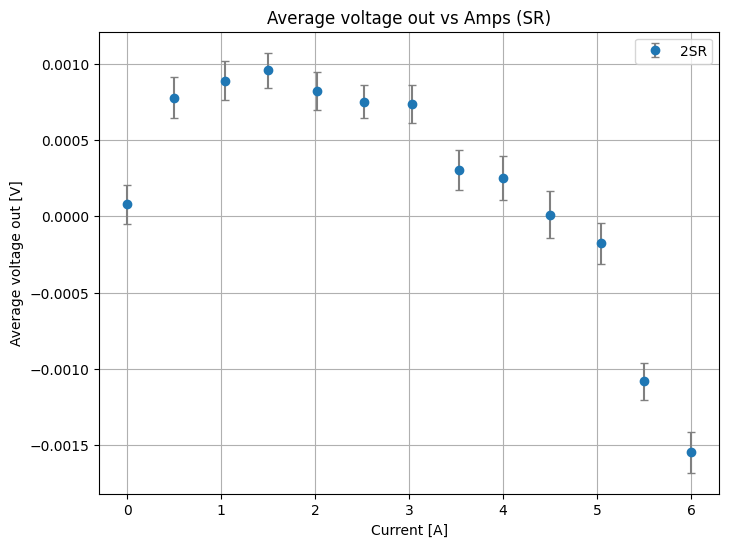

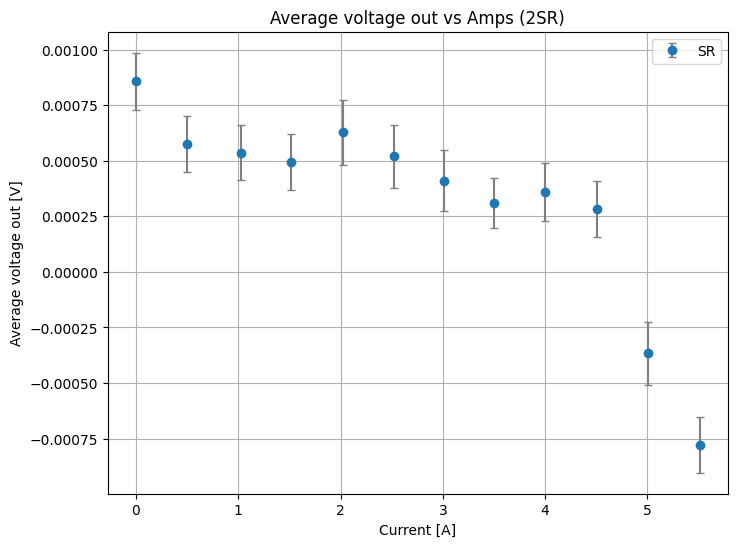

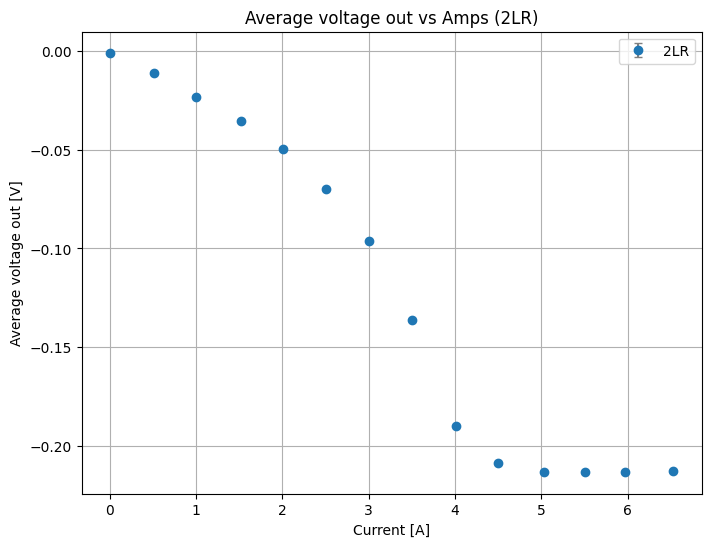

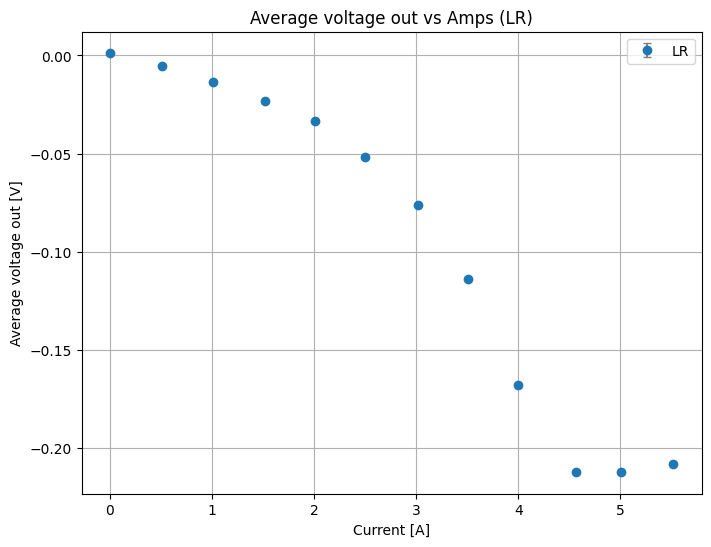

In [7]:
import matplotlib.pyplot as plt

# SR plot
plt.figure(figsize=(8,6))
plt.errorbar(
    avg_dataSR["Amps"],                 # x-axis
    avg_dataSR["Average voltage out"],   # y-axis
    yerr=avg_dataSR["Vol Std"],          # y error only
    fmt='o',                             # marker
    ecolor='gray',                       # error bar color
    capsize=3,                           # caps on error bars
    label='2SR'
)
plt.xlabel("Current [A]")
plt.ylabel("Average voltage out [V]")
plt.title("Average voltage out vs Amps (SR)")
plt.grid(True)
plt.legend()
plt.show()

# 2SR plot
plt.figure(figsize=(8,6))
plt.errorbar(
    avg_data2SR["Amps"],                 # x-axis
    avg_data2SR["Average voltage out"],   # y-axis
    yerr=avg_data2SR["Vol Std"],          # y error only
    fmt='o',                             # marker
    ecolor='gray',                       # error bar color
    capsize=3,                           # caps on error bars
    label='SR'
)
plt.xlabel("Current [A]")
plt.ylabel("Average voltage out [V]")
plt.title("Average voltage out vs Amps (2SR)")
plt.grid(True)
plt.legend()
plt.show()

# 2LR plot
plt.figure(figsize=(8,6))
plt.errorbar(
    avg_data2LR["Amps"],
    avg_data2LR["Average voltage out"],
    yerr=avg_data2LR["Vol Std"],
    fmt='o',
    ecolor='gray',
    capsize=3,
    label='2LR'
)
plt.xlabel("Current [A]")
plt.ylabel("Average voltage out [V]")
plt.title("Average voltage out vs Amps (2LR)")
plt.grid(True)
plt.legend()
plt.show()

# 2LR plot
plt.figure(figsize=(8,6))
plt.errorbar(
    avg_dataLR["Amps"],
    avg_dataLR["Average voltage out"],
    yerr=avg_dataLR["Vol Std"],
    fmt='o',
    ecolor='gray',
    capsize=3,
    label='LR'
)
plt.xlabel("Current [A]")
plt.ylabel("Average voltage out [V]")
plt.title("Average voltage out vs Amps (LR)")
plt.grid(True)
plt.legend()
plt.show()


With the actual Meassured Gauss to Tesla

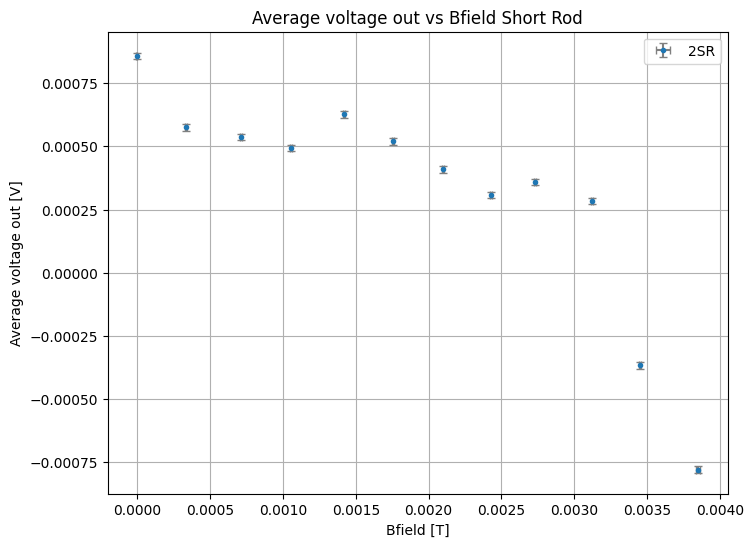

In [8]:
# 2SR plot
plt.figure(figsize=(8,6))
plt.errorbar(
    avg_data2SR["Bfield_mean"],          # x
    avg_data2SR["Average voltage out"],# y
    xerr=avg_data2SR["Bfield_SEM"], # x error
    yerr=avg_data2SR["Vol SEM"],       # y error
    fmt='.',                           # marker
    ecolor='gray',                     # error bar color
    capsize=3,                         # caps on error bars
    label='2SR'
)
plt.xlabel("Bfield [T]")
plt.ylabel("Average voltage out [V]")
plt.title("Average voltage out vs Bfield Short Rod")
plt.grid(True)
plt.legend()
plt.show()

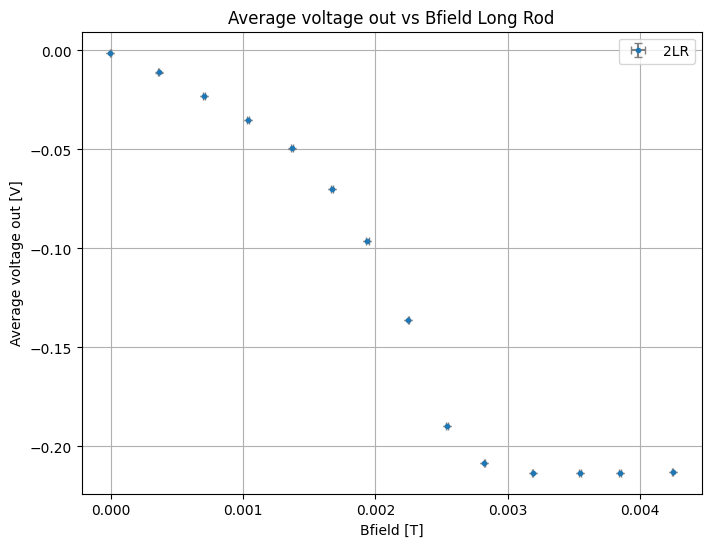

In [9]:
# 2LR plot
plt.figure(figsize=(8,6))
plt.errorbar(
    avg_data2LR["Bfield_mean"],
    avg_data2LR["Average voltage out"],
    xerr=avg_data2LR["Bfield_SEM"],
    yerr=avg_data2LR["Vol SEM"],
    fmt='.',
    ecolor='gray',
    capsize=3,
    label='2LR'
)
plt.xlabel("Bfield [T]")
plt.ylabel("Average voltage out [V]")
plt.title("Average voltage out vs Bfield Long Rod")
plt.grid(True)
plt.legend()
plt.show()

Note: Long Rod Probably touching the Coil, no increase on force showned after .03 Tesla, so lets remove those for points for now.

In [10]:
fullavg_dataLR = avg_dataLR.copy()      # save the complete DataFrame
fullavg_data2LR = avg_data2LR.copy()    # same here

# Now safely slice for fitting
avg_dataLR = avg_dataLR[:-2].copy()
avg_data2LR = avg_data2LR[:-4].copy()


In [11]:
import numpy as np

mu0 = 4*np.pi*1e-7     # vacuum permeability
N = 200                # <-- number of turns per coil per Pasco Page
R = 0.06               # <-- radius in meters 

# Helmholtz constant
C = (4/5)**1.5 * mu0 * N / R

def append_B_field(df):
    I = df["Amps"].values
    
    # Compute B
    B = C * I
    
    df["Bfield_mean"] = B
    return df

# Apply to both sets:
avg_dataSR = append_B_field(avg_dataSR)
avg_dataLR = append_B_field(avg_dataLR)


In [12]:
avg_dataLR

,Average voltage out,Vol Std,Vol SEM,Amps,Bfield_mean
0,0.001259,0.000151,0.000015,0.000,0.000000
1,-0.005169,0.000125,0.000013,0.511,0.001532
2,-0.013595,0.000120,0.000012,1.010,0.003027
3,-0.023234,0.000123,0.000012,1.520,0.004556
4,-0.033583,0.000134,0.000013,2.007,0.006015
5,-0.051881,0.000147,0.000015,2.500,0.007493
6,-0.076022,0.000135,0.000014,3.015,0.009037
7,-0.113875,0.000130,0.000013,3.508,0.010514
8,-0.167825,0.000146,0.000015,4.000,0.011989
9,-0.212585,0.000130,0.000013,4.570,0.013697


/var/folders/rq/4gv3g_sn73l94q6vfzvc2g6w0000gn/T/ipykernel_3269/1744649300.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


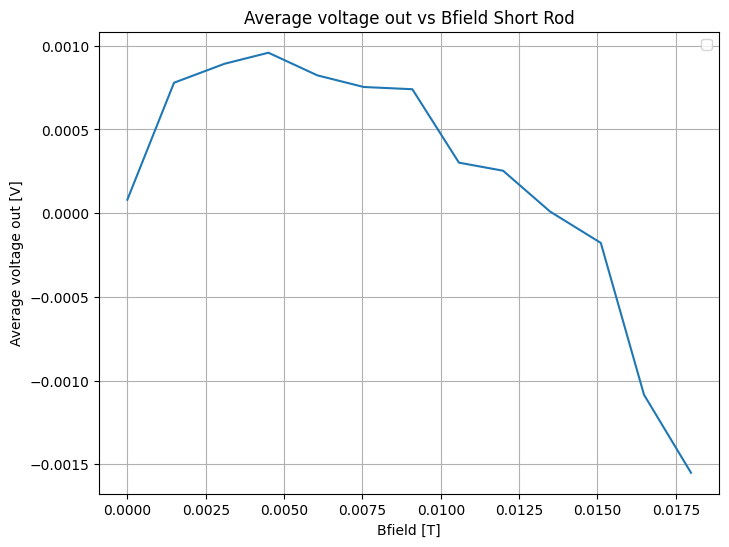

/var/folders/rq/4gv3g_sn73l94q6vfzvc2g6w0000gn/T/ipykernel_3269/1744649300.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


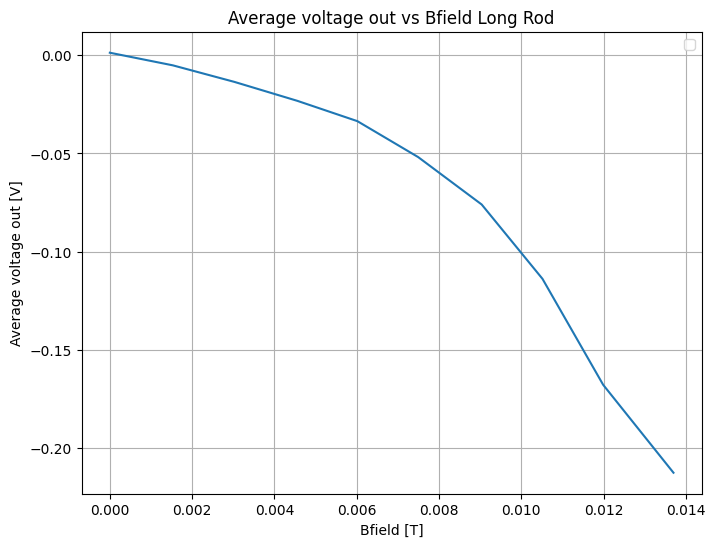

In [13]:
# SR plot
plt.figure(figsize=(8,6))
plt.errorbar(
    avg_dataSR["Bfield_mean"],          # x
    avg_dataSR["Average voltage out"],# y
)
plt.xlabel("Bfield [T]")
plt.ylabel("Average voltage out [V]")
plt.title("Average voltage out vs Bfield Short Rod")
plt.grid(True)
plt.legend()
plt.show()

# 2LR plot
plt.figure(figsize=(8,6))
plt.errorbar(
    avg_dataLR["Bfield_mean"],
    avg_dataLR["Average voltage out"],
)
plt.xlabel("Bfield [T]")
plt.ylabel("Average voltage out [V]")
plt.title("Average voltage out vs Bfield Long Rod")
plt.grid(True)
plt.legend()
plt.show()

In [14]:
import numpy as np

r = 0.05  # meters
sigma_r = 0.0005  # meters
slope_mg = 3.5063e-5  # V/mg
sigmaV = 0.002  # V

# Convert slope to V/N
mg_to_N = 9.80665e-6
slope_V_per_N = slope_mg / mg_to_N

def voltage_to_tau(voltage):
    F = np.abs(voltage) / slope_V_per_N
    tau = r * F
    return tau, F

# Apply to dataframes and split tuple into two columns
for df in [avg_data2SR, avg_data2LR, avg_dataSR, avg_dataLR]:
    df[['tau_max', 'F']] = df['Average voltage out'].apply(voltage_to_tau).tolist()
    df['sigma_tau'] = df['tau_max'] * np.sqrt( (slope_V_per_N * sigmaV/df['Average voltage out'])**2 + (sigma_r/r)**2 )

avg_data2LR

,Average voltage out,Vol Std,Vol SEM,Amps,Bfield_mean,Bfield_std,Bfield_SEM,tau_max,F,sigma_tau
0,-0.001162,0.000129,0.000013,0.000,-0.000005,0.000007,0.000005,0.000016,0.000325,0.000100
1,-0.011132,0.000117,0.000012,0.506,0.000360,0.000010,0.000006,0.000156,0.003114,0.000100
2,-0.023195,0.000126,0.000013,1.004,0.000705,0.000013,0.000006,0.000324,0.006487,0.000100
3,-0.035302,0.000119,0.000012,1.515,0.001035,0.000013,0.000006,0.000494,0.009874,0.000100
4,-0.049520,0.000123,0.000012,2.004,0.001370,0.000010,0.000006,0.000693,0.013850,0.000100
5,-0.070179,0.000132,0.000013,2.502,0.001670,0.000010,0.000006,0.000981,0.019628,0.000100
6,-0.096470,0.000127,0.000013,3.005,0.001940,0.000039,0.000011,0.001349,0.026981,0.000101
7,-0.136084,0.000124,0.000012,3.501,0.002250,0.000010,0.000006,0.001903,0.038061,0.000102
8,-0.189867,0.000125,0.000012,4.010,0.002540,0.000010,0.000006,0.002655,0.053103,0.000103
9,-0.208604,0.000121,0.000012,4.500,0.002825,0.000013,0.000006,0.002917,0.058344,0.000104


## Fitting

We fit generally to a parabola since 
$$
torque \propto  voltage  \propto  Bfield^2
$$
And lets use curve_fit from scipy, to find the values and their uncertainty

In [15]:
from scipy.optimize import curve_fit
import numpy as np

def fit_voltage_parabola(xdata, ydata, yerr=None, mode="quadratic"):
    """
    Fit V(B) using different models.
    
    Parameters
    ----------
    xdata, ydata : arrays
    yerr : arrays, SEM for weighting
    mode : str
        "quadratic"      → V = a*B^2 + b*B + c
        "zero_intercept" → V = k*B^2
        "offset_only"    → V = k*B^2 + V0
    
    Returns
    -------
    popt : fitted parameters
    perr : parameter uncertainties (sqrt diag of covariance)
    model : callable model function
    """

    if mode == "zero_intercept":
        def model(B, k):
            return k * B**2

    elif mode == "offset_only":
        def model(B, k, V0):
            return k * B**2 + V0

    elif mode == "quadratic":
        def model(B, a, b, c):
            return a*B**2 + b*B + c
    else:
        raise ValueError("mode must be 'quadratic', 'zero_intercept', or 'offset_only'")

    popt, pcov = curve_fit(
        model,
        xdata,
        ydata,
        sigma=yerr,
        absolute_sigma=True
    )
    perr = np.sqrt(np.diag(pcov))
    
    return popt, perr, model

Lets Find fits 

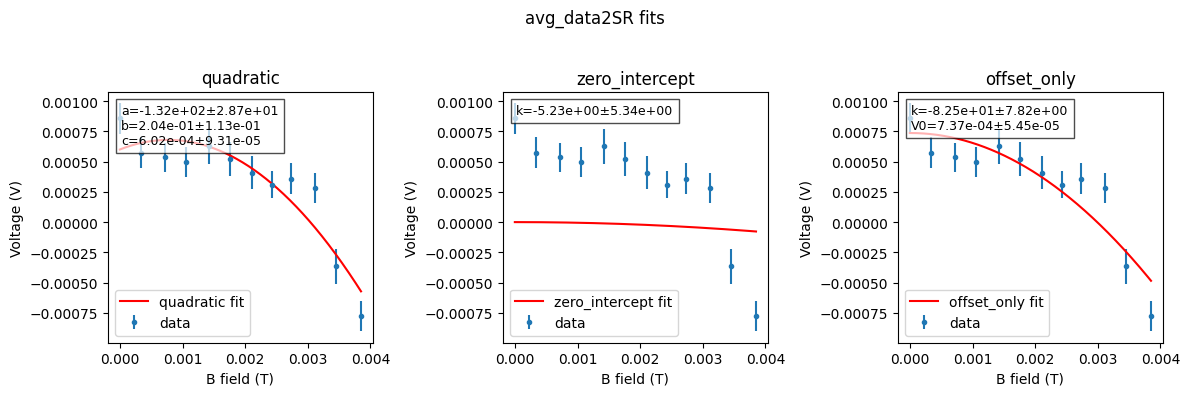


=== Fits for avg_data2SR ===
Mode            Param        Value       ±Error
quadratic       a     -1.321763e+02 2.874967e+01
quadratic       b     2.037033e-01 1.134526e-01
quadratic       c     6.018387e-04 9.306276e-05
zero_intercept  k     -5.234333e+00 5.343747e+00
offset_only     k     -8.250213e+01 7.818805e+00
offset_only     V0    7.373259e-04 5.446577e-05

=== Chi-squared Analysis for avg_data2SR ===
Mode                    Chi2    Reduced Chi2
quadratic          2.023e+01       2.247e+00
zero_intercept     2.067e+02       1.879e+01
offset_only        2.345e+01       2.345e+00


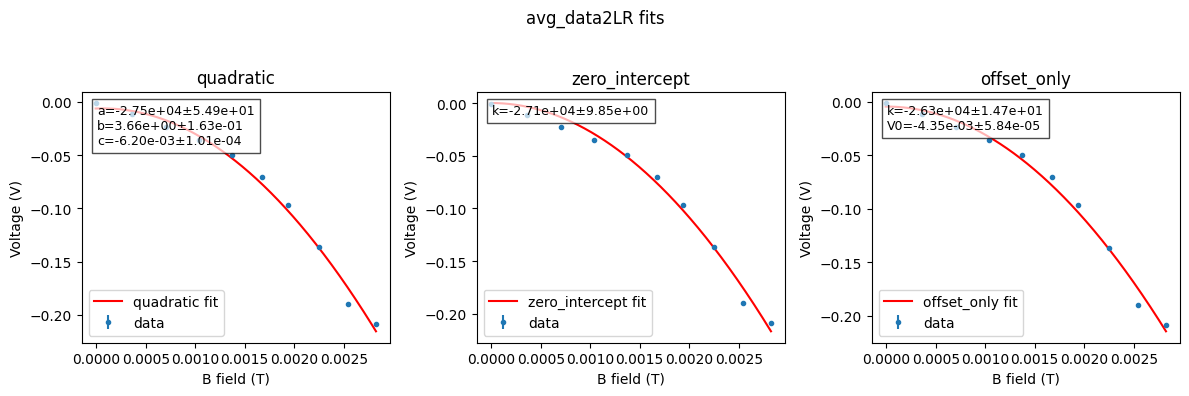


=== Fits for avg_data2LR ===
Mode            Param        Value       ±Error
quadratic       a     -2.750193e+04 5.487934e+01
quadratic       b     3.664550e+00 1.631819e-01
quadratic       c     -6.204019e-03 1.013154e-04
zero_intercept  k     -2.712285e+04 9.850638e+00
offset_only     k     -2.631436e+04 1.466910e+01
offset_only     V0    -4.345062e-03 5.841601e-05

=== Chi-squared Analysis for avg_data2LR ===
Mode                    Chi2    Reduced Chi2
quadratic          2.925e+04       4.178e+03
zero_intercept     3.529e+04       3.921e+03
offset_only        2.975e+04       3.719e+03


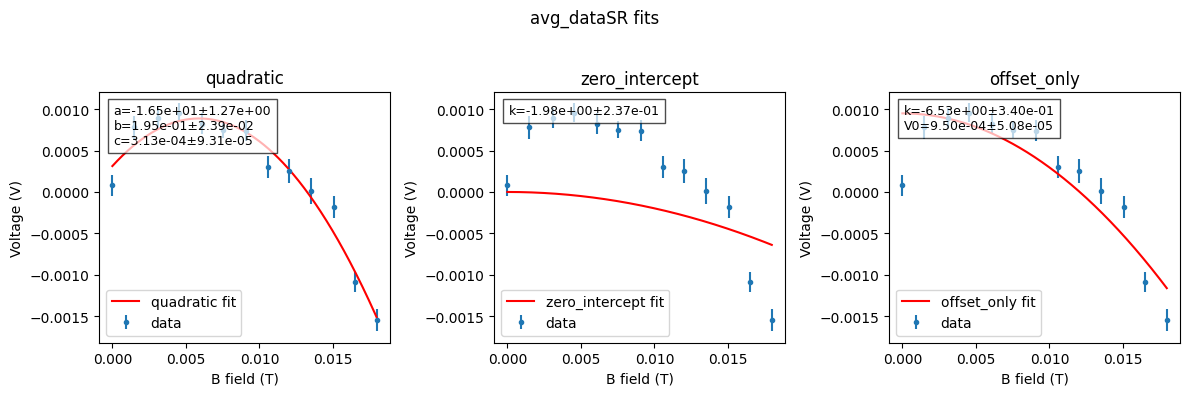


=== Fits for avg_dataSR ===
Mode            Param        Value       ±Error
quadratic       a     -1.649198e+01 1.267468e+00
quadratic       b     1.947828e-01 2.387509e-02
quadratic       c     3.130941e-04 9.312489e-05
zero_intercept  k     -1.976864e+00 2.367359e-01
offset_only     k     -6.529832e+00 3.397329e-01
offset_only     V0    9.497045e-04 5.082696e-05

=== Chi-squared Analysis for avg_dataSR ===
Mode                    Chi2    Reduced Chi2
quadratic          1.932e+01       1.932e+00
zero_intercept     4.350e+02       3.625e+01
offset_only        8.588e+01       7.807e+00


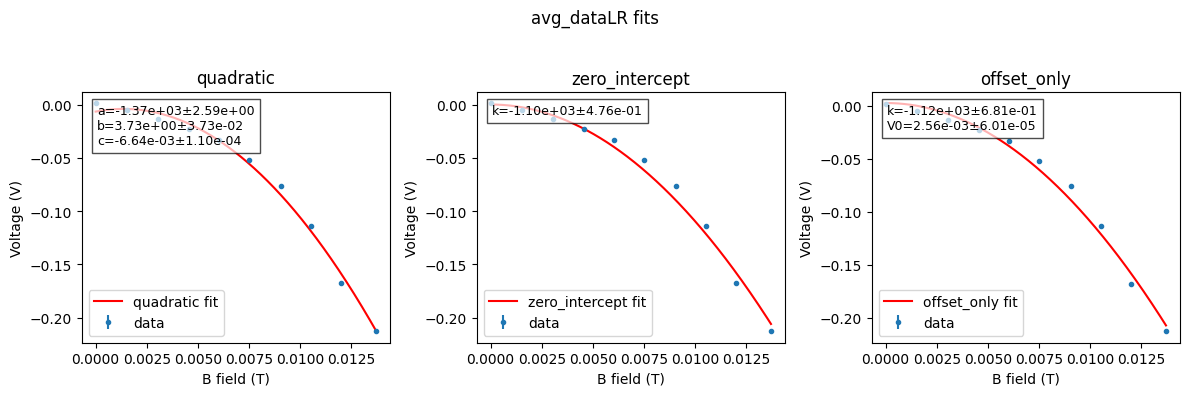


=== Fits for avg_dataLR ===
Mode            Param        Value       ±Error
quadratic       a     -1.367035e+03 2.588953e+00
quadratic       b     3.725266e+00 3.733433e-02
quadratic       c     -6.644878e-03 1.101143e-04
zero_intercept  k     -1.097071e+03 4.764795e-01
offset_only     k     -1.117813e+03 6.813617e-01
offset_only     V0    2.560261e-03 6.012073e-05

=== Chi-squared Analysis for avg_dataLR ===
Mode                    Chi2    Reduced Chi2
quadratic          1.691e+04       2.415e+03
zero_intercept     2.868e+04       3.186e+03
offset_only        2.686e+04       3.358e+03


In [16]:
import matplotlib.pyplot as plt
import numpy as np

dfs = {
    "avg_data2SR": avg_data2SR,
    "avg_data2LR": avg_data2LR,
    "avg_dataSR": avg_dataSR,
    "avg_dataLR": avg_dataLR
}

fit_modes = ["quadratic", "zero_intercept", "offset_only"]

param_map = {
    "quadratic": ["a","b","c"],
    "zero_intercept": ["k"],
    "offset_only": ["k","V0"]
}

def compute_chi2(x, y, yerr, popt, model):
    yfit = model(x, *popt)
    residuals = y - yfit
    chi2 = np.sum((residuals / yerr) ** 2)
    dof = len(y) - len(popt)
    reduced_chi2 = chi2 / dof if dof > 0 else np.nan
    return residuals, chi2, reduced_chi2

for df_name, df in dfs.items():
    df_clean = df.dropna(subset=["Bfield_mean", "Average voltage out"])
    xdata = df_clean["Bfield_mean"].values
    ydata = df_clean["Average voltage out"].values
    yerr = df_clean.get("Vol Std", np.ones_like(ydata)*1e-6).values
    
    chi2_list = []
    
    # --- Plotting ---
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"{df_name} fits")
    
    for i, mode in enumerate(fit_modes, 1):
        popt, perr, model = fit_voltage_parabola(xdata, ydata, yerr=yerr, mode=mode)
        residuals, chi2, reduced_chi2 = compute_chi2(xdata, ydata, yerr, popt, model)
        chi2_list.append((mode, chi2, reduced_chi2))
        
        param_names = param_map[mode]  # define once per loop
        
        # --- Plot fit ---
        xfit = np.linspace(np.min(xdata), np.max(xdata), 500)
        yfit = model(xfit, *popt)
        ax = plt.subplot(1, 3, i)
        ax.errorbar(xdata, ydata, yerr=yerr, fmt=".", label="data")
        ax.plot(xfit, yfit, "r-", label=f"{mode} fit")
        param_text = "\n".join([f"{name}={val:.2e}±{err:.2e}" for name, val, err in zip(param_names, popt, perr)])
        ax.text(0.05, 0.95, param_text, transform=ax.transAxes,
                verticalalignment='top', fontsize=9, bbox=dict(facecolor='white', alpha=0.7))
        ax.set_xlabel("B field (T)")
        ax.set_ylabel("Voltage (V)")
        ax.set_title(mode)
        ax.legend()
    
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()
    
    # --- Print fit parameters ---
    print(f"\n=== Fits for {df_name} ===")
    print(f"{'Mode':<15} {'Param':<5} {'Value':>12} {'±Error':>12}")
    for i, mode in enumerate(fit_modes):
        popt, perr, _ = fit_voltage_parabola(xdata, ydata, yerr=yerr, mode=mode)
        param_names = param_map[mode]
        for name, val, err in zip(param_names, popt, perr):
            print(f"{mode:<15} {name:<5} {val:12.6e} {err:12.6e}")
    
    # --- Print chi-squared table ---
    print(f"\n=== Chi-squared Analysis for {df_name} ===")
    print(f"{'Mode':<15} {'Chi2':>12} {'Reduced Chi2':>15}")
    for mode, chi2, reduced_chi2 in chi2_list:
        print(f"{mode:<15} {chi2:12.3e} {reduced_chi2:15.3e}")


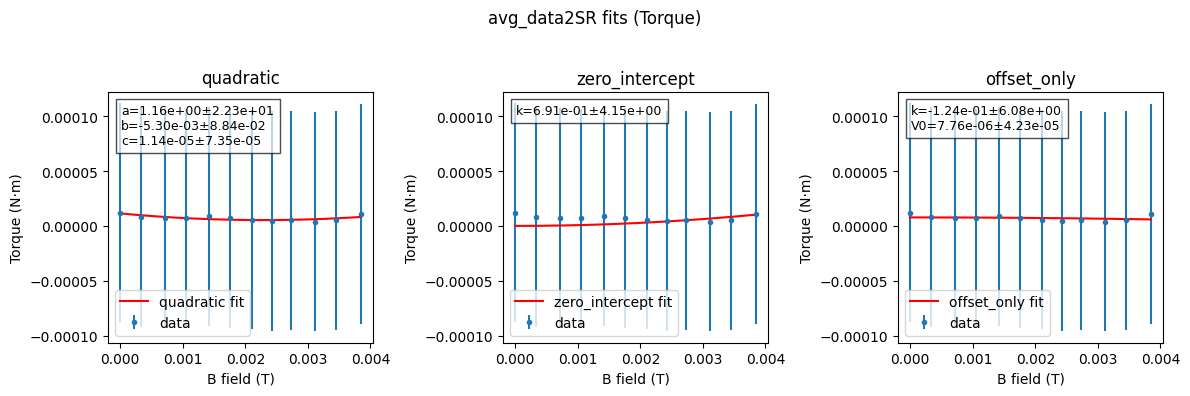


=== Fits for avg_data2SR (Torque) ===
Mode            Param        Value       ±Error
quadratic       a     1.161352e+00 2.225782e+01
quadratic       b     -5.303122e-03 8.835651e-02
quadratic       c     1.136160e-05 7.345922e-05
zero_intercept  k     6.913780e-01 4.148507e+00
offset_only     k     -1.237298e-01 6.080948e+00
offset_only     V0    7.757551e-06 4.231448e-05

=== Chi-squared Analysis for avg_data2SR (Torque) ===
Mode                    Chi2    Reduced Chi2
quadratic          2.977e-03       3.308e-04
zero_intercept     4.019e-02       3.654e-03
offset_only        6.579e-03       6.579e-04


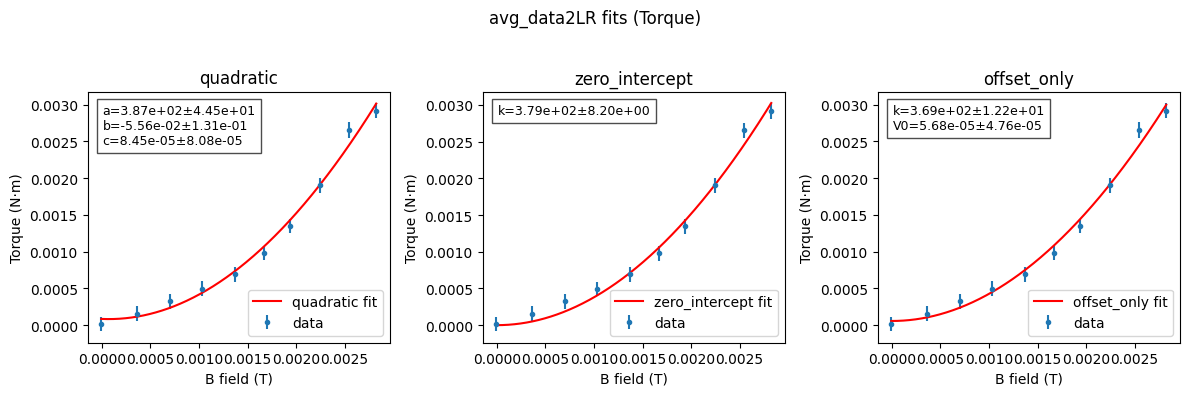


=== Fits for avg_data2LR (Torque) ===
Mode            Param        Value       ±Error
quadratic       a     3.867295e+02 4.451899e+01
quadratic       b     -5.558728e-02 1.306093e-01
quadratic       c     8.453132e-05 8.079746e-05
zero_intercept  k     3.792954e+02 8.196719e+00
offset_only     k     3.685090e+02 1.221168e+01
offset_only     V0    5.675350e-05 4.762756e-05

=== Chi-squared Analysis for avg_data2LR (Torque) ===
Mode                    Chi2    Reduced Chi2
quadratic          8.570e+00       1.224e+00
zero_intercept     1.017e+01       1.130e+00
offset_only        8.751e+00       1.094e+00


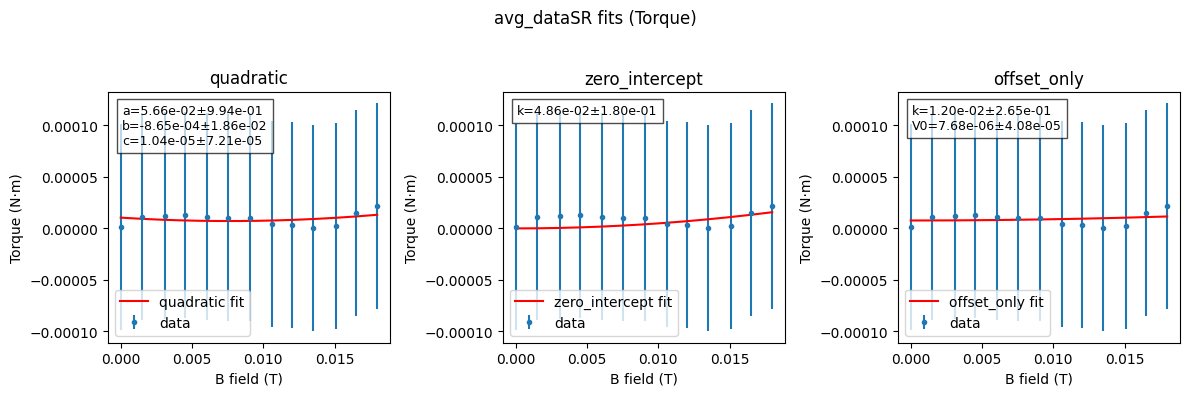


=== Fits for avg_dataSR (Torque) ===
Mode            Param        Value       ±Error
quadratic       a     5.664798e-02 9.939668e-01
quadratic       b     -8.647577e-04 1.856821e-02
quadratic       c     1.044764e-05 7.209015e-05
zero_intercept  k     4.858172e-02 1.799724e-01
offset_only     k     1.202961e-02 2.647747e-01
offset_only     V0    7.679823e-06 4.080366e-05

=== Chi-squared Analysis for avg_dataSR (Torque) ===
Mode                    Chi2    Reduced Chi2
quadratic          4.376e-02       4.376e-03
zero_intercept     8.136e-02       6.780e-03
offset_only        4.593e-02       4.176e-03


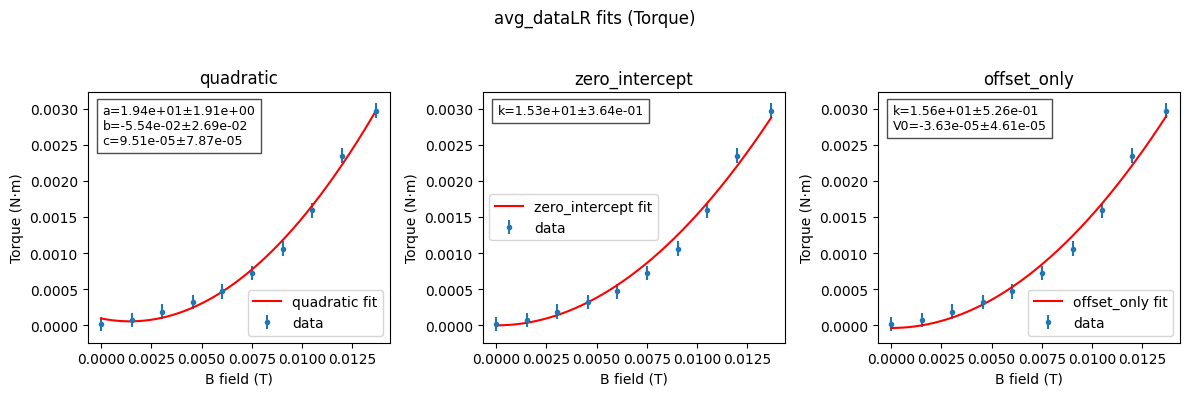


=== Fits for avg_dataLR (Torque) ===
Mode            Param        Value       ±Error
quadratic       a     1.940914e+01 1.909820e+00
quadratic       b     -5.539546e-02 2.690323e-02
quadratic       c     9.510527e-05 7.874490e-05
zero_intercept  k     1.532978e+01 3.641772e-01
offset_only     k     1.562903e+01 5.264035e-01
offset_only     V0    -3.631225e-05 4.612230e-05

=== Chi-squared Analysis for avg_dataLR (Torque) ===
Mode                    Chi2    Reduced Chi2
quadratic          5.448e+00       7.783e-01
zero_intercept     1.031e+01       1.145e+00
offset_only        9.688e+00       1.211e+00


In [17]:
for df_name, df in dfs.items():
    df_clean = df.dropna(subset=["Bfield_mean", "tau_max"])
    xdata = df_clean["Bfield_mean"].values
    ydata = df_clean["tau_max"].values  # <-- now using torque
    yerr = df_clean.get("sigma_tau", np.ones_like(ydata)*1e-6).values  # use torque SEM if available
    
    chi2_list = []
    
    # --- Plotting ---
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"{df_name} fits (Torque)")
    
    for i, mode in enumerate(fit_modes, 1):
        popt, perr, model = fit_voltage_parabola(xdata, ydata, yerr=yerr, mode=mode)
        residuals, chi2, reduced_chi2 = compute_chi2(xdata, ydata, yerr, popt, model)
        chi2_list.append((mode, chi2, reduced_chi2))
        
        param_names = param_map[mode]
        
        # --- Plot fit ---
        xfit = np.linspace(np.min(xdata), np.max(xdata), 500)
        yfit = model(xfit, *popt)
        ax = plt.subplot(1, 3, i)
        ax.errorbar(xdata, ydata, yerr=yerr, fmt=".", label="data")
        ax.plot(xfit, yfit, "r-", label=f"{mode} fit")
        param_text = "\n".join([f"{name}={val:.2e}±{err:.2e}" 
                                for name, val, err in zip(param_names, popt, perr)])
        ax.text(0.05, 0.95, param_text, transform=ax.transAxes,
                verticalalignment='top', fontsize=9, bbox=dict(facecolor='white', alpha=0.7))
        ax.set_xlabel("B field (T)")
        ax.set_ylabel("Torque (N·m)")
        ax.set_title(mode)
        ax.legend()
    
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()
    
    # --- Print fit parameters ---
    print(f"\n=== Fits for {df_name} (Torque) ===")
    print(f"{'Mode':<15} {'Param':<5} {'Value':>12} {'±Error':>12}")
    for i, mode in enumerate(fit_modes):
        popt, perr, _ = fit_voltage_parabola(xdata, ydata, yerr=yerr, mode=mode)
        param_names = param_map[mode]
        for name, val, err in zip(param_names, popt, perr):
            print(f"{mode:<15} {name:<5} {val:12.6e} {err:12.6e}")
    
    # --- Print chi-squared table ---
    print(f"\n=== Chi-squared Analysis for {df_name} (Torque) ===")
    print(f"{'Mode':<15} {'Chi2':>12} {'Reduced Chi2':>15}")
    for mode, chi2, reduced_chi2 in chi2_list:
        print(f"{mode:<15} {chi2:12.3e} {reduced_chi2:15.3e}")


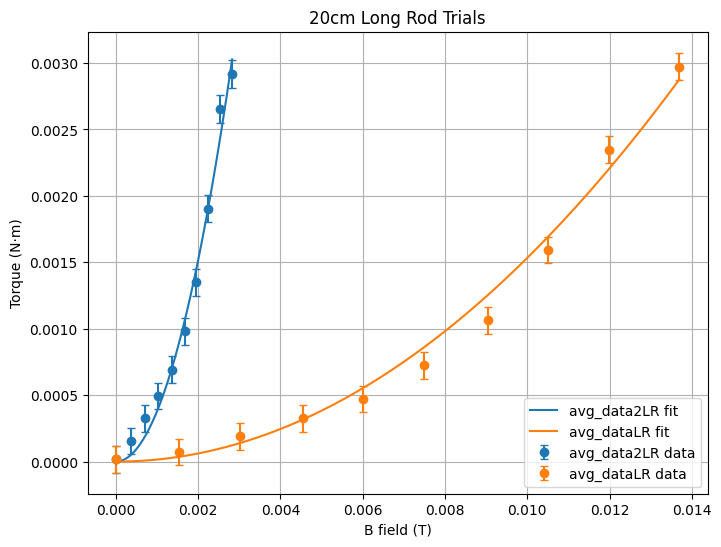

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Color cycle for trials
colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])

plt.figure(figsize=(8,6))
plt.title("20cm Long Rod Trials")
plt.xlabel("B field (T)")
plt.ylabel("Torque (N·m)")  # <-- updated

for df_name, df in dfs.items():
    if "LR" not in df_name:  # Only LR trials
        continue
    color = next(colors)
    
    # Drop NaNs
    df_clean = df.dropna(subset=["Bfield_mean", "tau_max"])
    xdata = df_clean["Bfield_mean"].values
    ydata = df_clean["tau_max"].values  # <-- now using torque
    yerr = df_clean.get("sigma_tau", np.ones_like(ydata)*1e-6).values  # use torque SEM if available
    
    # Fit zero_intercept
    popt, perr, model = fit_voltage_parabola(xdata, ydata, yerr=yerr, mode="zero_intercept")
    
    # Plot data points
    plt.errorbar(xdata, ydata, yerr=yerr, fmt='o', color=color, capsize=3,
                 label=f"{df_name} data")
    
    # Plot fit
    xfit = np.linspace(np.min(xdata), np.max(xdata), 200)
    yfit = model(xfit, *popt)
    plt.plot(xfit, yfit, '-', color=color, label=f"{df_name} fit")

plt.legend()
plt.grid(True)
plt.show()


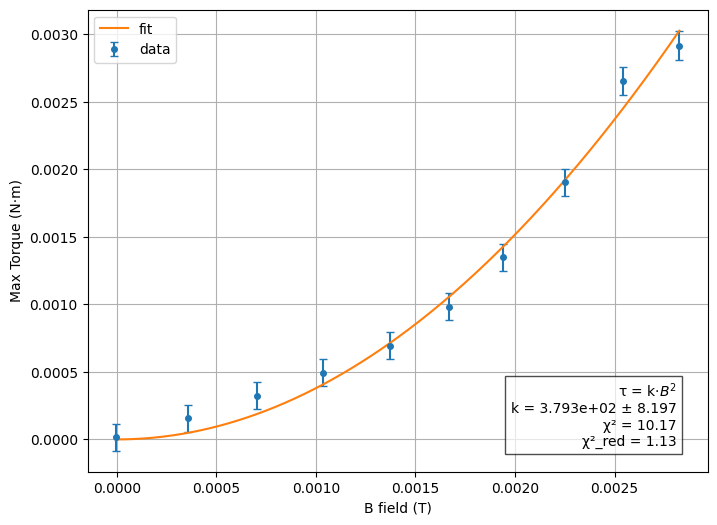

In [19]:
import matplotlib.pyplot as plt
import numpy as np

df_name = "avg_data2LR"
df = dfs[df_name]

# Clean data
df_clean = df.dropna(subset=["Bfield_mean", "tau_max"])
xdata = df_clean["Bfield_mean"].values
ydata = df_clean["tau_max"].values
yerr = df_clean.get("sigma_tau", np.ones_like(ydata)*1e-6).values

# Fit zero_intercept
popt, perr, model = fit_voltage_parabola(
    xdata, ydata, yerr=yerr, mode="zero_intercept"
)

# Chi²
yfit = model(xdata, *popt)
residuals = ydata - yfit
chi2 = np.sum((residuals / yerr)**2)
dof = len(xdata) - len(popt)
reduced_chi2 = chi2 / dof

k, = popt
k_err, = perr

# Fit line for plotting
xfit = np.linspace(np.min(xdata), np.max(xdata), 300)
yfit_plot = model(xfit, *popt)


plt.figure(figsize=(8,6))


#plt.title(f"{df_name} — Zero-Intercept Fit (Torque)")
plt.xlabel("B field (T)")
plt.ylabel("Max Torque (N·m)")

# Data
plt.errorbar(xdata, ydata, yerr=yerr, fmt='o', markersize=4, capsize=3, label="data")
plt.plot(xfit, yfit_plot, '-', label="fit")

# Fit text box — bottom-right
fit_text = (
    f"τ = k·$B^2$\n"
    f"k = {k:.3e} ± {k_err:.3f}\n"
    f"χ² = {chi2:.2f}\n"
    f"χ²_red = {reduced_chi2:.2f}"
)

ax = plt.gca()
ax.text(0.95, 0.05, fit_text,  # bottom-right
        transform=ax.transAxes,
        va='bottom', ha='right',
        bbox=dict(facecolor='white', alpha=0.7))

plt.legend(loc='best')
plt.grid(True)
plt.savefig('example_plot.png', dpi=300, bbox_inches='tight')  # PNG format
plt.show()


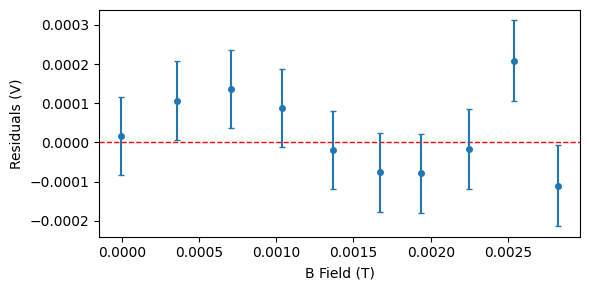

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# x, y, popt, model already defined
x = xdata
y = ydata
residuals = y - model(x, *popt)

fig, ax = plt.subplots(figsize=(6, 3))

# Zero-line
ax.axhline(0, linestyle='--', color='red', linewidth=1)

# Residuals with vertical error bars
ax.errorbar(
    x, residuals, 
    yerr=yerr,              # your measurement uncertainties
    fmt='o', 
    markersize=4,
    capsize=2,
)

ax.set_xlabel("B Field (T)")
ax.set_ylabel("Residuals (V)")

plt.tight_layout()
plt.show()


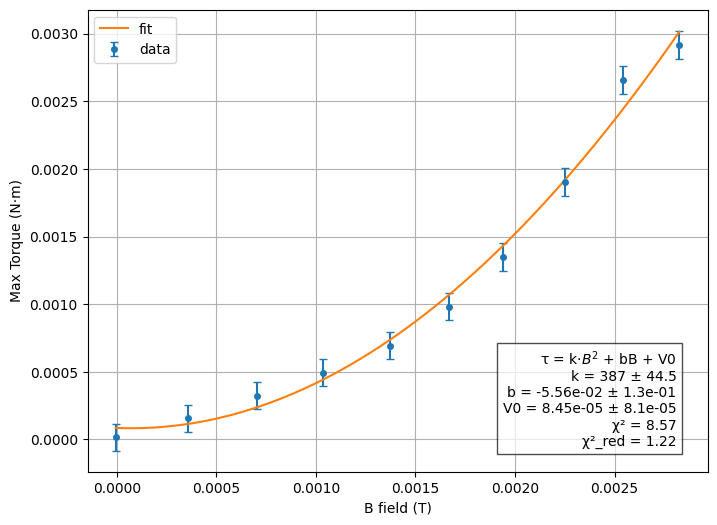

In [36]:
import matplotlib.pyplot as plt
import numpy as np

df_name = "avg_data2LR"
df = dfs[df_name]

# Clean data
df_clean = df.dropna(subset=["Bfield_mean", "tau_max"])
xdata = df_clean["Bfield_mean"].values
ydata = df_clean["tau_max"].values
yerr = df_clean.get("sigma_tau", np.ones_like(ydata)*1e-6).values

# Fit zero_intercept
popt, perr, model = fit_voltage_parabola(
    xdata, ydata, yerr=yerr, mode="quadratic"
)

# Chi²
yfit = model(xdata, *popt)
residuals = ydata - yfit
chi2 = np.sum((residuals / yerr)**2)
dof = len(xdata) - len(popt)
reduced_chi2 = chi2 / dof

k, b, V0 = popt
k_err, b_err, V0_err = perr

# Fit line for plotting
xfit = np.linspace(np.min(xdata), np.max(xdata), 300)
yfit_plot = model(xfit, *popt)


plt.figure(figsize=(8,6))


#plt.title(f"{df_name} — Zero-Intercept Fit (Torque)")
plt.xlabel("B field (T)")
plt.ylabel("Max Torque (N·m)")

# Data
plt.errorbar(xdata, ydata, yerr=yerr, fmt='o', markersize=4, capsize=3, label="data")
plt.plot(xfit, yfit_plot, '-', label="fit")

# Fit text box — bottom-right
fit_text = (
    f"τ = k·$B^2$ + bB + V0\n"
    f"k = {k:.0f} ± {k_err:.1f}\n"
    f"b = {b:.2e} ± {b_err:.1e}\n"
    f"V0 = {V0:.2e} ± {V0_err:.1e}\n"
    f"χ² = {chi2:.2f}\n"
    f"χ²_red = {reduced_chi2:.2f}"
)

ax = plt.gca()
ax.text(0.95, 0.05, fit_text,  # bottom-right
        transform=ax.transAxes,
        va='bottom', ha='right',
        bbox=dict(facecolor='white', alpha=0.7))

plt.legend(loc='best')
plt.grid(True)
plt.savefig('example_plot.png', dpi=300, bbox_inches='tight')  # PNG format
plt.show()


In [31]:
# -----------------------------
# fit of tau_max propto B**2
# -----------------------------
#k = 3.793e+02          # V/T^2
#k_err = 8.197          # V/T^2 uncertainty

# -----------------------------
# Compute susceptibility
# chi = 2 k mu / Vol
# -----------------------------
l = 0.22 #22cm
d = 0.01 #1cm
r = d/2
Vol = np.pi * r**2 * l
chi = 2 * k * mu0 / Vol
chi_err = chi * np.sqrt((k_err/k)**2)

print(Vol)
print(f"chi = {chi:.3e} ± {chi_err:.3e}")


1.727875959474386e-05
chi = 5.625e+01 ± 6.475e+00
